In [16]:
from langgraph.graph import StateGraph, START,END 
from langchain_google_genai import ChatGoogleGenerativeAI 
import os 
from typing import TypedDict, Annotated, Literal
from dotenv import load_dotenv 
from pydantic import BaseModel,Field 

In [3]:
load_dotenv()

True

In [4]:
os.environ['GOOGLE_API_KEY'] = os.getenv('gemini_api_key')

In [5]:
class QuadraticState(TypedDict): 

    a : int 
    b : int 
    c: int 
    equation: str
    disccrimanant: float 
    result: str 
    

In [37]:
def show_equation(state: QuadraticState):

    eq = f"{state['a']}x² + {state['b']}x + {state['c']} = 0"
    return {"equation": eq} 

def caluculate_discriment(state:QuadraticState):
    det = state['b']**2 - (4*state['a']*state['c'])
    return {'disccrimanant': det } 

def real_roots(state:QuadraticState):
    import math
    root1 = (-state['b'] + math.sqrt(state['disccrimanant'])) / (2*state['a'])
    root2 = (-state['b'] - math.sqrt(state['disccrimanant'])) / (2*state['a']) 
    result = f"x₁ = {root1}, x₂ = {root2}"
    return {"result":result} 

def repeated_roots(state:QuadraticState):
    root = -state['b'] / (2*state['a'])
    result = f"One real root (repeated) x = {root}"
    return {"result":result}

def no_real_roots(state:QuadraticState):
    result = f'Roots are non real'
    return {"result": result}

def check_condition(state:QuadraticState)-> Literal["real_roots","repeated_roots", "no_real_roots"]:
    if state['disccrimanant'] == 0:
        return "repeated_roots" 
    elif state['disccrimanant'] > 0:
        return "real_roots"
    else:
        return "no_real_roots"

In [38]:
graph = StateGraph(QuadraticState) 

graph.add_node('show_equation',show_equation)
graph.add_node('calculate_discrimnent', caluculate_discriment)
graph.add_node('real_roots',real_roots)
graph.add_node('repeated_roots',repeated_roots)
graph.add_node('no_real_roots',no_real_roots)

graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','calculate_discrimnent')

graph.add_conditional_edges('calculate_discrimnent',check_condition)
graph.add_edge('real_roots',END)
graph.add_edge('repeated_roots',END)
graph.add_edge('no_real_roots',END)


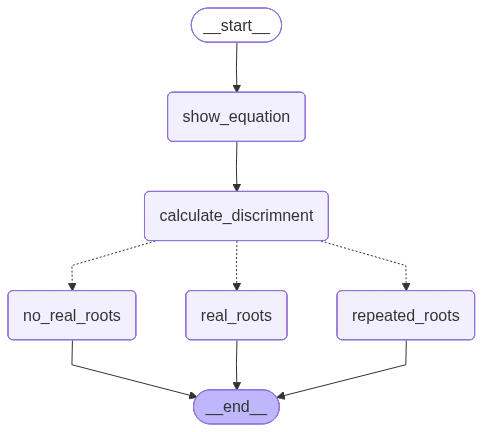

In [39]:
graph.compile()

In [40]:
workflow = graph.compile()

In [41]:
intial_state = {
    "a" : 2,
    "b" : 3,
    "c":1
}

In [42]:
workflow.invoke(intial_state)

{'a': 2,
 'b': 3,
 'c': 1,
 'equation': '2x² + 3x + 1 = 0',
 'disccrimanant': 1,
 'result': 'x₁ = -0.5, x₂ = -1.0'}